In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [60]:
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_medium.json", "r") as f:
    factscores = json.load(f)

num_true_all = []
num_total_all = []
skipped_idxs = []
for i in range(len(factscores["decisions"])):
    decison = factscores["decisions"][i]
    if decison == None:
        skipped_idxs.append(i)
    else:
        num_total = len(decison)
        num_total_all.append(min(num_total, 6))
        num_true = np.sum([fact["is_supported"] for fact in decison])
        num_true_all.append(min(num_true, 6))

In [172]:
model_path = "ckpts/rm2_bios_llama7B_5/checkpoint_10000/hf_model"
# model_path = "ckpts/rm2_bios_llama7B_3/checkpoint_05000/hf_model"


pred_num_correct_zero_to_six_probs = np.load(model_path+"/test_medium_num_correct_zero_to_six_probs.npy")


pred_num_total_zero_to_six_probs = np.load(model_path+"/test_medium_num_total_zero_to_six_probs.npy")


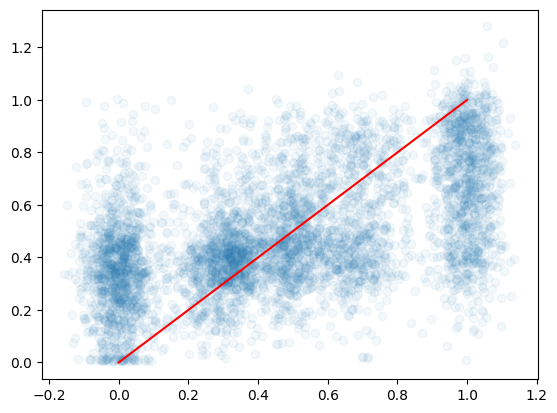

In [178]:
num_correct = np.tile([0, 1, 2, 3, 4, 5, 6], (6, 1))
num_total = np.tile([1, 2, 3, 4, 5, 6], (7, 1)).transpose()

ratios = num_correct/num_total

pred_ratio = []
for i in range(len(pred_num_correct_zero_to_six_probs)):
    num_correct_probs = np.tile(pred_num_correct_zero_to_six_probs[i], (6, 1))
    num_total_probs = np.tile(pred_num_total_zero_to_six_probs[i, 1:], (7, 1)).transpose()

    ratios_probs = num_correct_probs*num_total_probs

    pred_ratio.append(np.sum(ratios_probs*ratios))

# pred_ratio = pred_num_correct_zero_to_six_probs.argmax(axis=1)/pred_num_total_zero_to_six_probs.argmax(axis=1)+np.random.normal(0, 0.05, len(num_true_all))
# pred_ratio = (pred_num_correct_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1)/(pred_num_total_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1)+np.random.normal(0, 0.05, len(num_true_all))

plt.scatter(np.array(num_true_all)/np.array(num_total_all)+np.random.normal(0, 0.05, len(num_true_all)), pred_ratio, alpha=0.05)

plt.plot([0, 1], [0, 1], color="red")
# plt.ylim(0, 1)

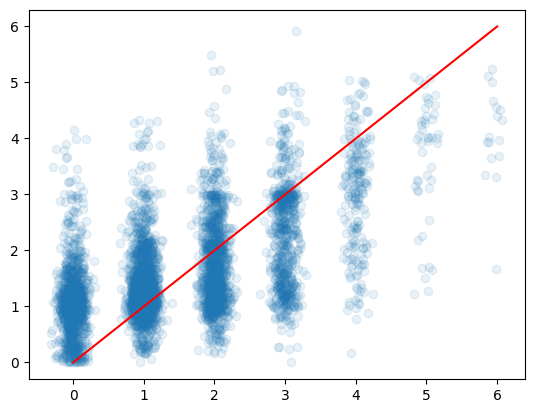

In [143]:
# pred_zero_to_six_probs.argmax(axis=1)
# pred_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]

plt.scatter(np.array(num_true_all)+np.random.normal(0, 0.1, len(num_true_all)), (pred_num_correct_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1), alpha=0.1)

# plt.scatter(np.array(num_total_all)+np.random.normal(0, 0.2, len(num_total_all)), (pred_num_total_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1), alpha=0.1)

plt.plot([0, 6], [0, 6], color="red")

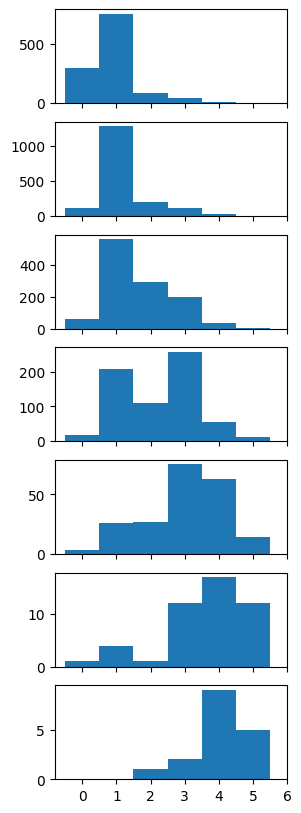

In [140]:
#make 7 subplots vertically
fig, axs = plt.subplots(7, 1, sharex=True, figsize=(3, 10))

for i in range(7):
    idxs = np.where(np.array(num_true_all) == i)[0]
    # axs[i].hist((pred_num_correct_zero_to_six_probs[idxs]*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1), bins=[0, 1, 2, 3, 4, 5, 6])

    axs[i].hist(pred_num_correct_zero_to_six_probs[idxs].argmax(-1), bins=np.array([0, 1, 2, 3, 4, 5, 6])-0.5)

    # axs[i].bar([0, 1, 2, 3, 4, 5, 6], (pred_num_correct_zero_to_six_probs[idxs]).mean(axis=0))

    axs[i].set_xticks(np.arange(0, 7, 1), [0, 1, 2, 3, 4, 5, 6])

    # axs[i].hist((pred_num_correct_zero_to_six_probs[idxs].argmax(-1)), bins=np.array([0, 1, 2, 3, 4, 5, 6, 7])-0.5)



    # axs[i].scatter(num_true_all, pred_num_correct_zero_to_six_probs[:, i], alpha=0.05)
    # axs[i].plot([0, 6], [0, 1], color="red")
    # axs[i].set_title(f"num_true={i}")

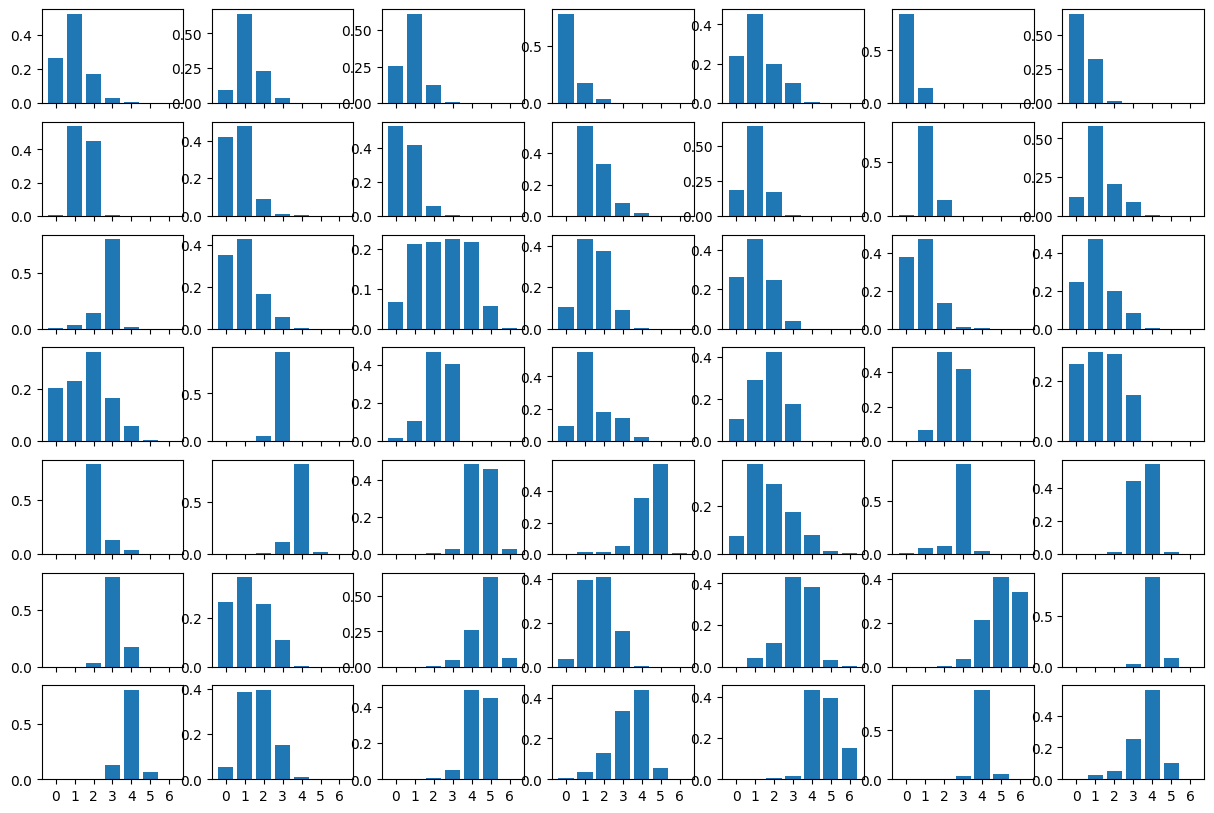

In [141]:
#make 7 subplots vertically
fig, axs = plt.subplots(7, 7, sharex=True, figsize=(15, 10))

for i in range(7):
    for j in range(7):
        idxs = np.where(np.array(num_true_all) == i)[0]
        # axs[i].hist((pred_num_correct_zero_to_six_probs[idxs]*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1), bins=[0, 1, 2, 3, 4, 5, 6])

        # axs[i][j].hist(pred_num_correct_zero_to_six_probs[idxs].argmax(-1), bins=np.array([0, 1, 2, 3, 4, 5, 6])-0.5)

        axs[i][j].bar([0, 1, 2, 3, 4, 5, 6], (pred_num_correct_zero_to_six_probs[idxs[j]]))

        axs[i][j].set_xticks(np.arange(0, 7, 1), [0, 1, 2, 3, 4, 5, 6])

        # axs[i].hist((pred_num_correct_zero_to_six_probs[idxs].argmax(-1)), bins=np.array([0, 1, 2, 3, 4, 5, 6, 7])-0.5)



        # axs[i].scatter(num_true_all, pred_num_correct_zero_to_six_probs[:, i], alpha=0.05)
        # axs[i].plot([0, 6], [0, 1], color="red")
        # axs[i].set_title(f"num_true={i}")

(0.0, 1.0)

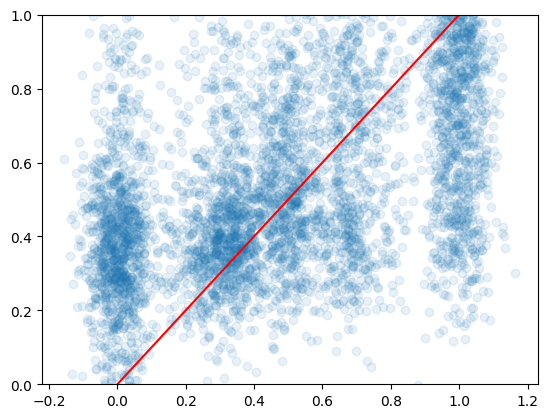